In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve,convolve2d
import math

question:1

In [2]:
vidcap = cv2.VideoCapture('/Users/vaishnaviveeranki/Desktop/asst3/video.mp4')
success,image = vidcap.read()
count = 0
while success:
    success,image = vidcap.read()
    if count%30==0 :
        image=cv2.flip(image,0)
        cv2.imwrite("/Users/vaishnaviveeranki/Desktop/asst3/images/frame%d.jpg" % count, image)     # save frame as JPEG file      
        print('Read a new frame: ', success)
    count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


In [3]:
def ssd(A,B):
    squares = (A[:,:,:3] - B[:,:,:3]) ** 2
    return math.sqrt(np.sum(squares))

In [4]:
def norm_data(data):
    mean_data=np.mean(data)
    std_data=np.std(data, ddof=1)
    return (data-mean_data)/(std_data)


def ncc(data0, data1):
    return (1.0/(data0.size-1)) * np.sum(norm_data(data0)*norm_data(data1))

In [5]:
import cv2

imdir = '/Users/vaishnaviveeranki/Desktop/asst3/images/'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
files.extend(glob.glob(imdir + '*.' + 'jpg'))

images = [cv2.imread(file) for file in files]
print(files)

['/Users/vaishnaviveeranki/Desktop/asst3/images/frame150.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame90.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame180.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame330.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame30.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame120.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame240.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame270.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame0.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame300.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame210.jpg', '/Users/vaishnaviveeranki/Desktop/asst3/images/frame60.jpg']


(848, 480, 3)


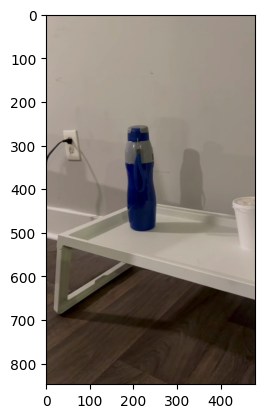

In [6]:
plt.imshow(cv2.cvtColor(images[7], cv2.COLOR_BGR2RGB))
print(images[0].shape)

True

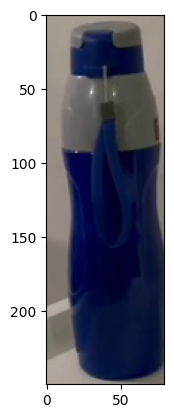

In [7]:
cropped_image = images[7][250:500,170:250]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

cv2.imwrite("Cropped Image.jpg", cropped_image)

In [8]:
d=dict()
d_norm=dict()
for i in range(0,598,20):
    for j in range(0,400,20):
        #print(i,j)
        #print(i+130,j+160)
        d[str(i)+":"+str(i+250),str(j)+":"+str(j+80)]=ssd(cropped_image,images[6][i:i+250,j:j+80])
        

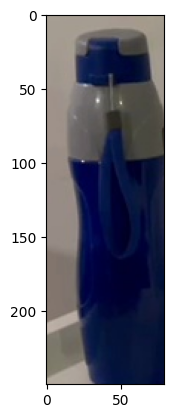

In [9]:
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))
plt.imshow(cv2.cvtColor(images[6][y1:y2,x1:x2], cv2.COLOR_BGR2RGB))

In [10]:
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(images[6], (x1,y1), (x2,y2), color, thickness)

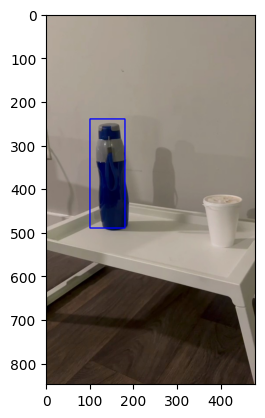

In [11]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

question:2A

In [12]:
Iref=cv2.imread('images/frame0.jpg',cv2.IMREAD_GRAYSCALE)
Inext=cv2.imread('images/frame30.jpg',cv2.IMREAD_GRAYSCALE)
Iref=np.array(Iref).astype(np.float32)
Inext=np.array(Inext).astype(np.float32)
kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25
kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
kernel_t = np.array([[1., 1.], [1., 1.]])*.25
Iref = Iref / 255. # normalize pixels
Inext = Inext / 255. # normalize pixels
Ix=cv2.filter2D(Iref,-1,kernel=kernel_x)
Iy=cv2.filter2D(Iref,-1,kernel=kernel_y)
It=cv2.filter2D(Iref,-1,kernel=kernel_t)+cv2.filter2D(Inext,-1,kernel=kernel_x)
Ix,Iy,It=np.array(Ix),np.array(Iy),np.array(It)

In [13]:
u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))
u

/var/folders/r3/92mmjtps4ybbh8xpynpwy6yw0000gn/T/ipykernel_59749/637791596.py:1: RuntimeWarning: divide by zero encountered in divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))


array([[      inf,       inf,       inf, ...,       inf,       inf,
              inf],
       [      inf,       inf,       inf, ...,       inf,       inf,
              inf],
       [      inf,       inf,       inf, ...,       inf,       inf,
              inf],
       ...,
       [49.851036, 51.972355, 33.093807, ..., 22.357248, 30.688435,
        23.853212],
       [36.000004, 37.000004, 33.988235, ..., 21.81921 , 23.190039,
        21.572777],
       [20.78894 , 20.223255, 30.005772, ..., 23.82812 , 21.96501 ,
        19.558395]], dtype=float32)

question-2B

In [14]:
import cv2
import numpy as np
 
def image_registraion(align,ref):

# Open the image files.
  img1_color = align  # Image to be aligned.
  img2_color = ref    # Reference image.
  
  # Convert to grayscale.
  img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
  img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
  height, width = img2.shape
  
  # Create ORB detector with 5000 features.
  orb_detector = cv2.ORB_create(5000)
  
  # Find keypoints and descriptors.
  # The first arg is the image, second arg is the mask
  #  (which is not required in this case).
  kp1, d1 = orb_detector.detectAndCompute(img1, None)
  kp2, d2 = orb_detector.detectAndCompute(img2, None)
  
  # Match features between the two images.
  # We create a Brute Force matcher with
  # Hamming distance as measurement mode.
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
  
  # Match the two sets of descriptors.
  matches = matcher.match(d1, d2)
  
  # Sort matches on the basis of their Hamming distance.
  matches=sorted(matches,key = lambda x: x.distance)
  
  # Take the top 90 % matches forward.
  matches = matches[:int(len(matches)*0.9)]
  no_of_matches = len(matches)
  
  # Define empty matrices of shape no_of_matches * 2.
  p1 = np.zeros((no_of_matches, 2))
  p2 = np.zeros((no_of_matches, 2))
  
  for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt
  
  # Find the homography matrix.
  homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
  
  # Use this matrix to transform the
  # colored image wrt the reference image.
  transformed_img = cv2.warpPerspective(img1_color,
                      homography, (width, height))
  return transformed_img

In [15]:
# importing the necessary libraries
import cv2
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture(r'/Users/vaishnaviveeranki/Desktop/asst3/video.mp4')
ret, frame = cap.read()

# Loop until the end of the video
while (cap.isOpened()):
	# Capture frame-by-frame
	prev=frame
	ret, frame = cap.read()
	disp=image_registraion(frame,prev)

	
	disp = cv2.resize(disp, (540, 380), fx = 0, fy = 0,
						interpolation = cv2.INTER_CUBIC)

	# Display the resulting frame
	frame=cv2.flip(frame,-1)
	cv2.imshow('Frame', disp)

	# define q as the exit button
	if cv2.waitKey(25) & 0xFF == ord('q'):
		break

# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


question:3

In [16]:
import cv2 as cv2
import numpy as np
def optical_flow(n):
    cap = cv2.VideoCapture(r"/Users/vaishnaviveeranki/Desktop/asst3/video.mp4")
    feature_params = dict( maxCorners = 100,
                        qualityLevel = 0.3,
                        minDistance = 7,
                        blockSize = 7 )
    # Parameters for lucas kanade optical flow
    lk_params = dict( winSize  = (15, 15),
                    maxLevel = 2,
                    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    # Create some random colors
    color = np.random.randint(0, 255, (100, 3))
    # Take first frame and find corners in it
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
    # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)

    count=0
    while(1):
        ret, frame = cap.read()
        count+=1
        if not ret:
            print('No frames grabbed!')
            break
        if(count%n==0):
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # calculate optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
            # Select good points
            if p1 is not None:
                good_new = p1[st==1]
                good_old = p0[st==1]
            # draw the tracks
            for i, (new, old) in enumerate(zip(good_new, good_old)):
                a, b = new.ravel()
                c, d = old.ravel()
                mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
                frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
            img = cv2.add(frame, mask)
            img=cv2.flip(img,-1)
            cv2.imshow('frame', img)
            if cv2.waitKey(1)==ord('q'):
                break
            # Now update the previous frame and previous points
            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1, 1, 2)
    cv2.destroyAllWindows()

question-3A

In [17]:
optical_flow(1)

No frames grabbed!


question-3B

In [18]:
optical_flow(11)

No frames grabbed!


question-3C

In [19]:
optical_flow(31)

No frames grabbed!


question--4

In [20]:
import cv2 as cv
import math as math
import numpy as np
org=cv.imread(r'/Users/vaishnaviveeranki/Desktop/asst3/img12345.webp')
ref=cv.imread(r'/Users/vaishnaviveeranki/Desktop/asst3/cropped_img12345.webp')
org = cv.cvtColor(org, cv.COLOR_BGR2GRAY)
ref=cv.cvtColor(ref, cv.COLOR_BGR2GRAY)
print(ref.shape)
print(org.shape)

(153, 152)
(390, 693)


In [21]:
def sum_squ_dis(cropped,orginal):
    squares = (cropped[:,:] - orginal[:,:]) ** 2
    return math.sqrt(np.sum(squares))

In [22]:
d=dict()
d_norm=dict()
for i in range(0,237,20):
    for j in range(0,541,20):
        d[str(i)+":"+str(i+153),str(j)+":"+str(j+152)]=sum_squ_dis(ref,org[i:i+153,j:j+152])
        #d_norm[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+100,j:j+100]))

In [23]:
a=sorted(d.items(), key=lambda x: x[1])

In [24]:
#print(d.items())
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))

In [25]:
color = (0, 255, 0)
thickness = 2
print(x1,y1)
image = cv.rectangle(org, (x1,y1), (x2,y2), color, thickness)
image=cv.rectangle(org, (400,195), (600,360), color, thickness)
cv.putText(image, 'flower', (x1+30, y1+30), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
cv.putText(image, 'flower', (410, 190), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

160 20


array([[107, 107, 107, ...,  41,  48,  51],
       [107, 107, 107, ...,  45,  48,  50],
       [107, 107, 108, ...,  48,  48,  50],
       ...,
       [110, 114, 122, ..., 124, 127, 127],
       [104, 104, 104, ..., 123, 125, 126],
       [ 95,  95,  95, ..., 123, 124, 123]], dtype=uint8)

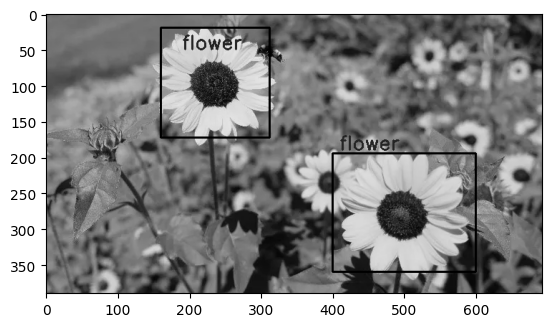

In [26]:
import matplotlib.pyplot as plt
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

question:5

In [27]:
import os
import time

import imutils
detectorPaths = {
    
    "face": "/Users/vaishnaviveeranki/Desktop/asst3/face.xml",
    
}

print("[INFO] loading haar cascades...")
detectors = dict()
 
for (name, path) in detectorPaths.items():
    detectors[name] = cv2.CascadeClassifier(path)

print("[INFO] starting video stream...")
vs = cv2.VideoCapture(0)

while True:
    _,frame = vs.read()
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faceRects = detectors["face"].detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE)

    for (fX, fY, fW, fH) in faceRects:
        faceROI = gray[fY:fY + fH, fX:fX + fW]

        
        cv2.rectangle(frame, (fX, fY), (fX + fW, fY + fH),
                      (0, 255, 0), 2)
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) == ord("q"):
        break

cv2.destroyAllWindows()


[INFO] loading haar cascades...
[INFO] starting video stream...


KeyboardInterrupt: 

question--6

In [28]:
# importing the module
import cv2

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

	# checking for left mouse clicks
	if event == cv2.EVENT_LBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font,
					1, (255, 0, 0), 2)
		cv2.imshow('image', img)

	# checking for right mouse clicks	
	if event==cv2.EVENT_RBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		b = img[y, x, 0]
		g = img[y, x, 1]
		r = img[y, x, 2]
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r),
					(x,y), font, 1,
					(255, 255, 0), 2)
		cv2.imshow('image', img)

# driver function
if __name__=="__main__":

	# reading the image
	img = cv2.imread(r'/Users/vaishnaviveeranki/Downloads/image2.jpg', 1)

	# displaying the image
	cv2.imshow('image', img)

	# setting mouse handler for the image
	# and calling the click_event() function
	cv2.setMouseCallback('image', click_event)

	# wait for a key to be pressed to exit
	cv2.waitKey(0)

	# close the window
	cv2.destroyAllWindows()

776   530


In [29]:
ul,vl= 545 ,  552
ur,vr=750  , 535
b=120 # distance between left and right cameras
f=1300.32324 #focallength
z=(b*f)/(ul-ur) #distance of object
print('The distance is '+str(z)+'mm')

The distance is -761.164823414634mm


question--7

In [30]:
cap = cv2.VideoCapture(0)
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0, 255, (100, 3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret, frame = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    img = cv2.add(frame, mask)
    cv2.imshow('frame', img)
    if cv2.waitKey(1)==ord('q'):
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
cv2.destroyAllWindows()